<a href="https://colab.research.google.com/github/eduviana1/TEEP_Chuva_Horaria/blob/main/8_Distribuicoes_CMORPH_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cmorph = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/df_cmorph.csv')
cmorph['DataHora'] = pd.to_datetime(cmorph['DataHora'], format = '%Y-%m-%d %H:%M:%S')
cmorph.drop(['Evento', 'Data', 'Hora'], axis = 1, inplace = True)
cmorph.head()

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1998-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Anual

<ipython-input-16-532262640>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(cmorph_anual_estacao.columns, rotation = 90)
<ipython-input-16-532262640>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Ano'].set_xticklabels(cmorph_anual_estacao.T.columns, rotation = 90)
<ipython-input-16-532262640>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(cmorph_anual_cidade.index, rotation = 90)


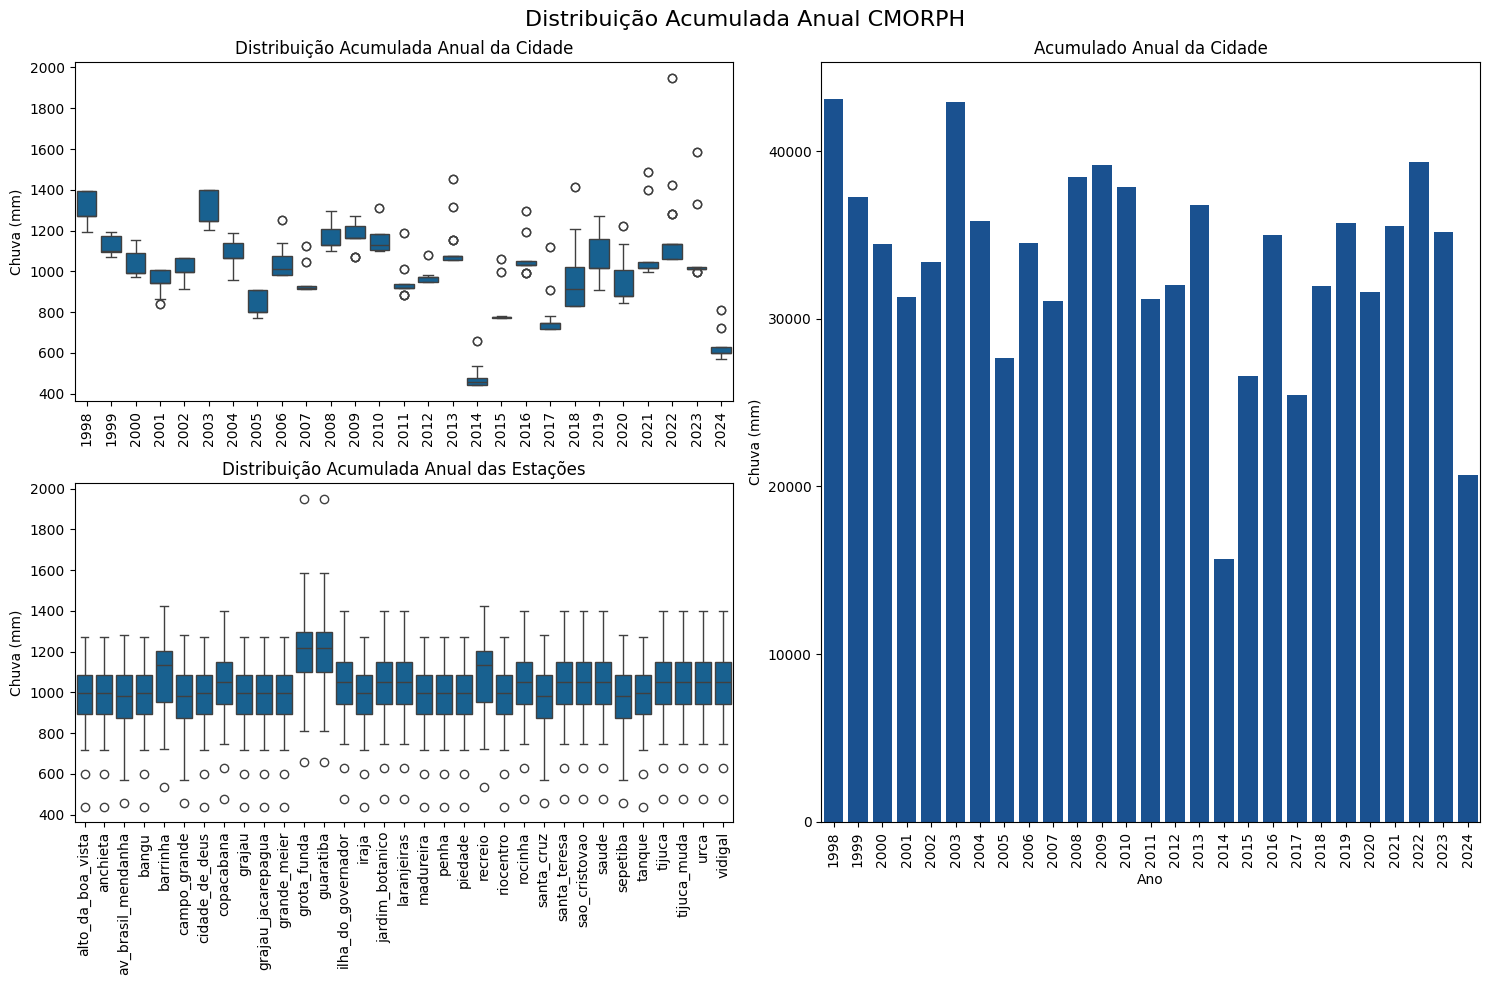

In [ ]:
# Distribuição Acumulada Anual
cmorph_anual = cmorph.copy()
cmorph_anual['Ano'] = cmorph_anual['DataHora'].dt.year
cmorph_anual_estacao = cmorph_anual.drop('DataHora', axis = 1).groupby('Ano').sum()
# cmorph_anual_estacao.drop('Ano', axis = 1, inplace = True)
cmorph_anual_cidade = cmorph_anual_estacao.sum(axis = 1)

# Resetando os dados originais
# cmorph.drop('Ano', axis = 1, inplace = True)

fig, ax = plt.subplot_mosaic([['Ano', 'Barra'],
                                          ['Estacoes', 'Barra']], figsize = (15, 10))

sns.boxplot(cmorph_anual_estacao, ax = ax['Estacoes'], color = '#0465a4')
sns.boxplot(cmorph_anual_estacao.T, ax = ax['Ano'], color = '#0465a4')
sns.barplot(cmorph_anual_cidade, ax = ax['Barra'], color = '#0650A4')

ax['Estacoes'].set_title('Distribuição Acumulada Anual das Estações')
ax['Ano'].set_title('Distribuição Acumulada Anual da Cidade')
ax['Barra'].set_title('Acumulado Anual da Cidade')

ax['Estacoes'].set_xticklabels(cmorph_anual_estacao.columns, rotation = 90)
ax['Ano'].set_xticklabels(cmorph_anual_estacao.T.columns, rotation = 90)
ax['Barra'].set_xticklabels(cmorph_anual_cidade.index, rotation = 90)

ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Ano'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

ax['Ano'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Anual CMORPH', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/CMORPH Acumulado Anual das Estações.jpg')

plt.show()

# Mensal

<ipython-input-17-2206340418>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(cmorph_mensal_estacao.columns, rotation = 90)
<ipython-input-17-2206340418>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Mes'].set_xticklabels(meses, rotation = 90)
<ipython-input-17-2206340418>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(meses, rotation = 90)


[]

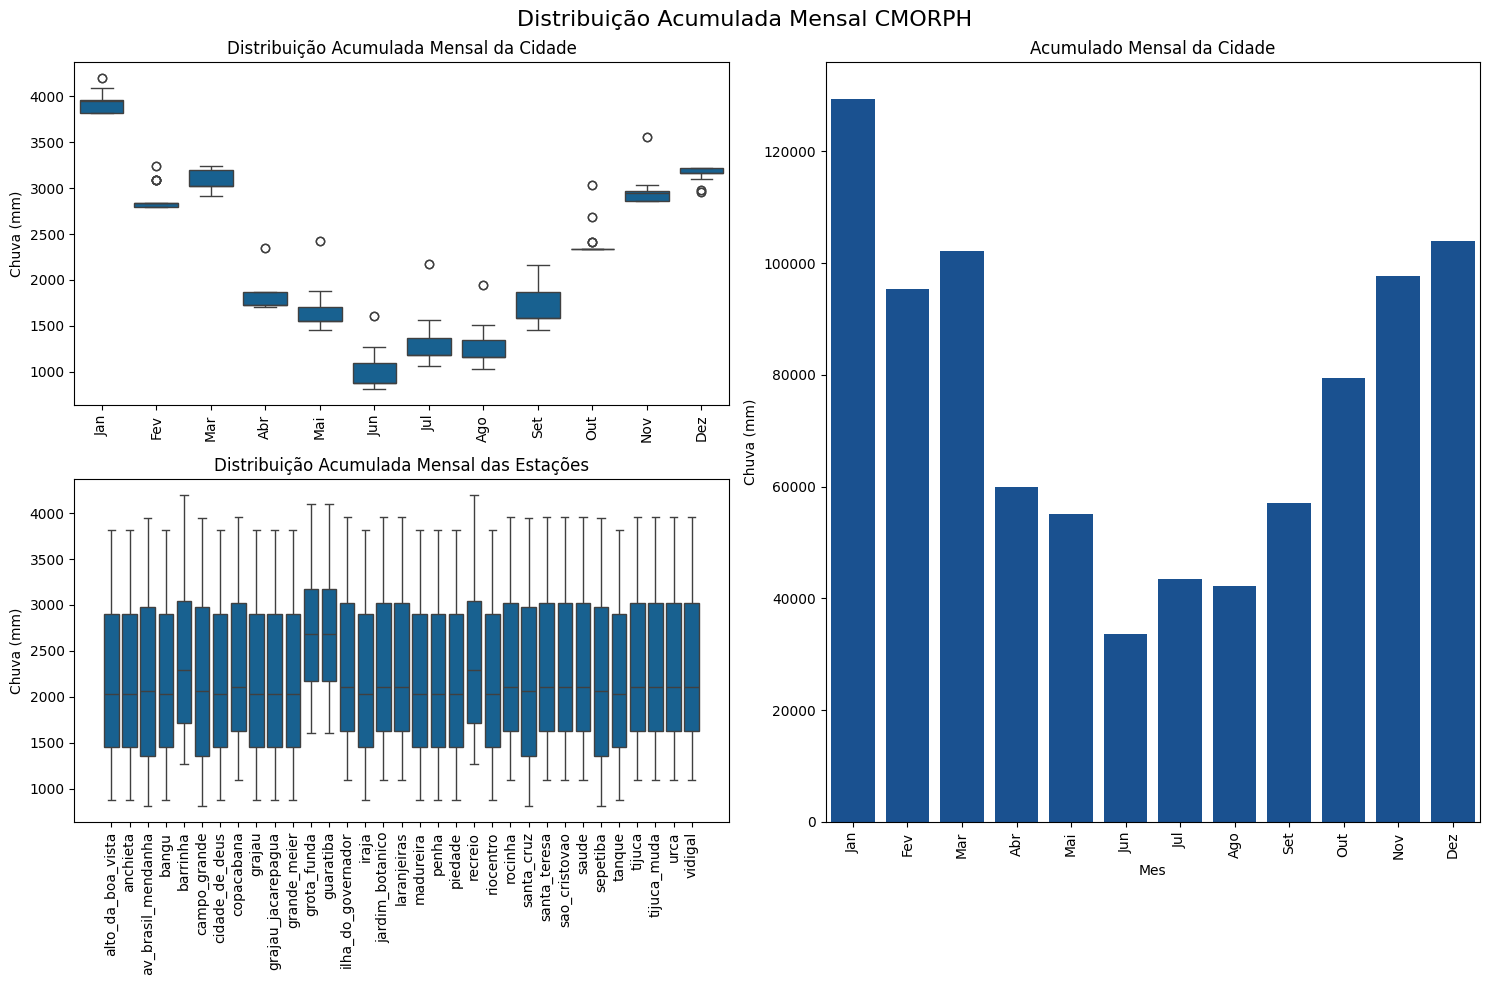

In [ ]:
# Distribuição Acumulada Mensal
cmorph_mensal = cmorph.copy()
cmorph_mensal['Mes'] = cmorph_mensal['DataHora'].dt.month
cmorph_mensal_estacao = cmorph_mensal.drop('DataHora', axis = 1).groupby('Mes').sum()
cmorph_mensal_cidade = cmorph_mensal_estacao.sum(axis = 1)

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']


fig, ax = plt.subplot_mosaic([['Mes', 'Barra'],
                                     ['Estacoes', 'Barra']], figsize = (15, 10))

sns.boxplot(cmorph_mensal_estacao, ax = ax['Estacoes'], color = '#0465a4')
sns.boxplot(cmorph_mensal_estacao.T, ax = ax['Mes'], color = '#0465a4')
sns.barplot(cmorph_mensal_cidade, ax = ax['Barra'], color = '#0650A4')

ax['Estacoes'].set_title('Distribuição Acumulada Mensal das Estações')
ax['Mes'].set_title('Distribuição Acumulada Mensal da Cidade')
ax['Barra'].set_title('Acumulado Mensal da Cidade')

ax['Estacoes'].set_xticklabels(cmorph_mensal_estacao.columns, rotation = 90)
ax['Mes'].set_xticklabels(meses, rotation = 90)
ax['Barra'].set_xticklabels(meses, rotation = 90)

ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Mes'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

ax['Mes'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Mensal CMORPH', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/CMORPH Acumulado Mensal das Estações.jpg')

plt.plot()

# Diario

<ipython-input-71-391366604>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cmorph_diario_estacao.columns, rotation = 90)


[]

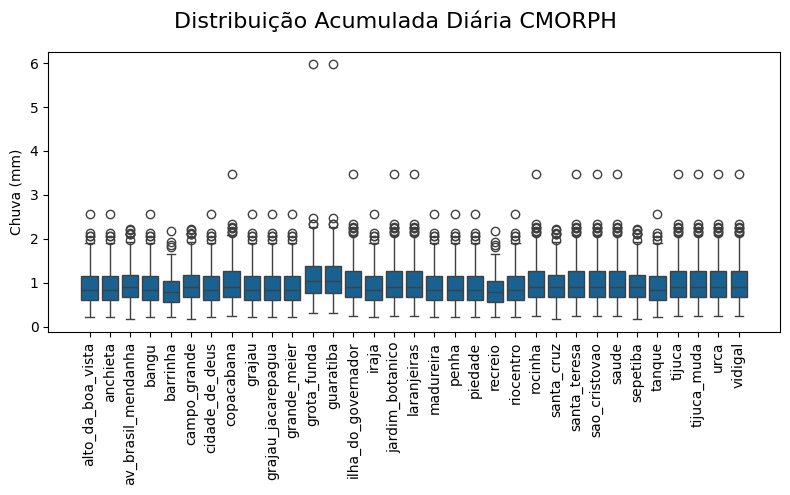

In [ ]:
# Diario
cmorph_diario = cmorph.copy()
cmorph_diario.set_index('DataHora', inplace = True)
cmorph_diario = cmorph_diario[cmorph_diario>0]
cmorph_diario.reset_index(names = 'DataHora', inplace = True)
cmorph_diario['DiaMes'] = cmorph_diario['DataHora'].dt.strftime('%d-%m')
cmorph_diario_estacao = cmorph_diario.drop('DataHora', axis = 1).groupby('DiaMes').mean()
cmorph_diario_cidade = cmorph_diario_estacao.sum(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(cmorph_diario_estacao, ax = ax, color = '#0465a4')

ax.set_xticklabels(cmorph_diario_estacao.columns, rotation = 90)
ax.set_ylabel('Chuva (mm)')


fig.suptitle('Distribuição Acumulada Diária CMORPH', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/CMORPH Acumulado Diário das Estações.jpg')

plt.plot()

<ipython-input-70-3934966632>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_acumulado_24h.columns, rotation = 90)


[]

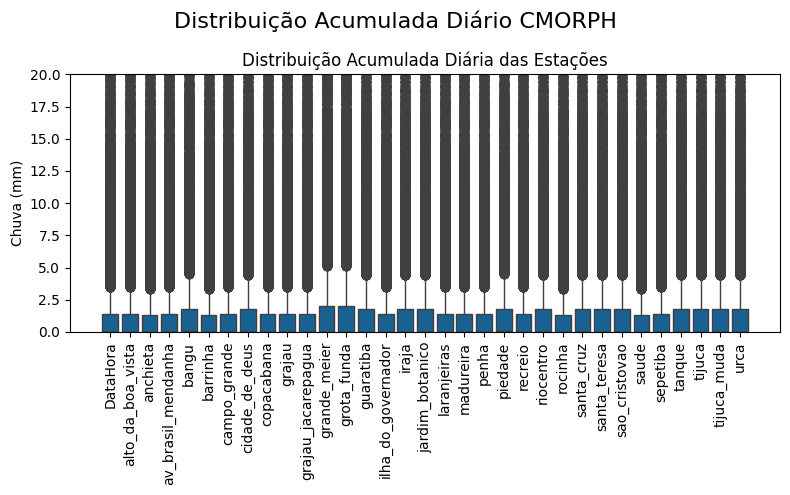

In [ ]:
# Diario
cmorph_diario = cmorph.copy()
cmorph_diario.set_index('DataHora', inplace = True)
cmorph_diario = cmorph_diario[cmorph_diario>0]
cmorph_diario.reset_index(names = 'DataHora', inplace = True)

# Captura a primeira DataHora de cada grupo de 24
datas = cmorph_diario['DataHora'].iloc[1::24].reset_index(drop=True)

# Agora cria o DataFrame somado e adiciona a coluna de datas
df_acumulado_24h = cmorph_diario.drop('DataHora', axis=1)
df_acumulado_24h = df_acumulado_24h.groupby(np.arange(len(cmorph_diario)) // 24).sum().reset_index(drop=True)
df_acumulado_24h.insert(0, 'DataHora', datas)

fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(df_acumulado_24h, ax = ax, color = '#0465a4')

ax.set_title('Distribuição Acumulada Diária das Estações')
ax.set_xticklabels(df_acumulado_24h.columns, rotation = 90)
ax.set_ylabel('Chuva (mm)')
ax.set_ylim(0,20)

fig.suptitle('Distribuição Acumulada Diário CMORPH', fontsize = 16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/CMORPH Acumulado Diário das Estações.jpg')

plt.plot()

# Horario

<ipython-input-19-3876729308>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Estacoes'].set_xticklabels(cmorph_horario_estacao.columns, rotation=90)
<ipython-input-19-3876729308>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Hora'].set_xticklabels(cmorph_horario_estacao.T.columns, rotation=90)
<ipython-input-19-3876729308>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax['Barra'].set_xticklabels(cmorph_horario_cidade.index.astype(str), rotation=90)


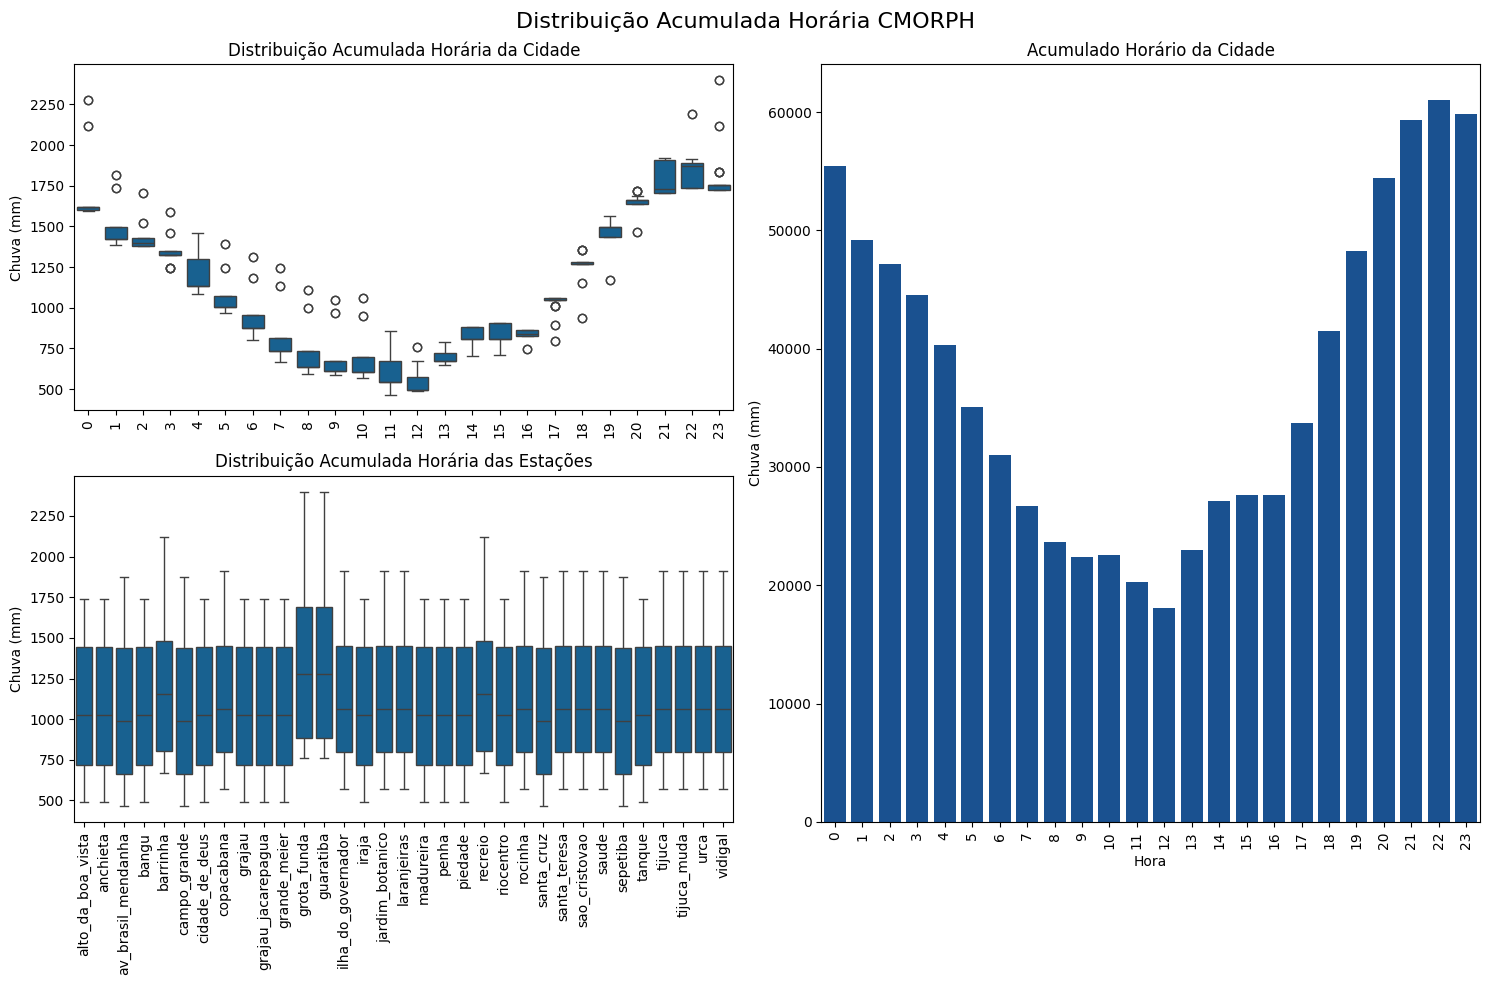

In [ ]:
# Distribuição Acumulada Horária - CMORPH

cmorph_horario = cmorph.copy()
cmorph_horario['Hora'] = cmorph_horario['DataHora'].dt.hour

# Agrupa por hora do dia (0h, 1h, ..., 23h)
cmorph_horario_estacao = cmorph_horario.drop('DataHora', axis=1).groupby('Hora').sum()

# Acumulado horário da cidade
cmorph_horario_cidade = cmorph_horario_estacao.sum(axis=1)

# Plotagem
fig, ax = plt.subplot_mosaic([['Hora', 'Barra'],
                               ['Estacoes', 'Barra']], figsize=(15, 10))

sns.boxplot(cmorph_horario_estacao, ax=ax['Estacoes'], color='#0465a4')
sns.boxplot(cmorph_horario_estacao.T, ax=ax['Hora'], color='#0465a4')
sns.barplot(x=cmorph_horario_cidade.index.astype(str), y=cmorph_horario_cidade.values, ax=ax['Barra'], color='#0650A4')

# Títulos
ax['Estacoes'].set_title('Distribuição Acumulada Horária das Estações')
ax['Hora'].set_title('Distribuição Acumulada Horária da Cidade')
ax['Barra'].set_title('Acumulado Horário da Cidade')

# Eixos X
ax['Estacoes'].set_xticklabels(cmorph_horario_estacao.columns, rotation=90)
ax['Hora'].set_xticklabels(cmorph_horario_estacao.T.columns, rotation=90)
ax['Barra'].set_xticklabels(cmorph_horario_cidade.index.astype(str), rotation=90)

# Eixos Y
ax['Estacoes'].set_ylabel('Chuva (mm)')
ax['Hora'].set_ylabel('Chuva (mm)')
ax['Barra'].set_ylabel('Chuva (mm)')

# Remove label redundante
ax['Hora'].set_xlabel('')

fig.suptitle('Distribuição Acumulada Horária CMORPH', fontsize=16)
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/CMORPH Acumulado Horário das Estações.jpg')

plt.show()
